In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import random
from sklearn.metrics import confusion_matrix, mean_squared_error, log_loss, accuracy_score
import time
from tensorflow.keras.models import model_from_json
from tensorflow.keras import layers
from tensorflow.keras import optimizers

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
experi = pd.read_csv('results/NN_experiments_with_1.0data.csv')

In [3]:
experi

,best_dev_mse,history,hyperparam
0,0.389459,"{'val_mean_squared_error': [0.5988649, 0.77573...","{'fc_hidden_size': 256, 'opt': 'sgd', 'n_fc_la..."
1,0.311236,"{'val_mean_squared_error': [0.8682483, 0.79990...","{'fc_hidden_size': 128, 'opt': 'sgd', 'n_fc_la..."
2,0.646048,"{'val_mean_squared_error': [0.64604783, nan, n...","{'fc_hidden_size': 256, 'opt': 'sgd', 'n_fc_la..."
3,0.637467,"{'val_mean_squared_error': [0.6374668, 0.64870...","{'fc_hidden_size': 128, 'opt': 'sgd', 'n_fc_la..."
4,0.785907,"{'val_mean_squared_error': [0.80521697, 0.8035...","{'fc_hidden_size': 128, 'opt': 'sgd', 'n_fc_la..."
5,0.817009,"{'val_mean_squared_error': [0.81705815, 0.8170...","{'fc_hidden_size': 256, 'opt': 'adam', 'n_fc_l..."
6,NaN,"{'val_mean_squared_error': [nan, nan, nan, nan...","{'fc_hidden_size': 256, 'opt': 'sgd', 'n_fc_la..."
7,0.239595,"{'val_mean_squared_error': [0.44015822, 0.4436...","{'fc_hidden_size': 256, 'opt': 'rmsprop', 'n_f..."
8,0.226587,"{'val_mean_squared_error': [0.52209395, 0.3647...","{'fc_hidden_size': 128, 'opt': 'rmsprop', 'n_f..."
9,0.188617,"{'val_mean_squared_error': [0.8308086, 0.80619...","{'fc_hidden_size': 256, 'opt': 'sgd', 'n_fc_la..."


In [4]:
experi = experi.sort_values('best_dev_mse', axis=0)

## load the best model to analyze

In [5]:
# best = experiments.loc[experiments['best_dev_mse'] == min(experiments['best_dev_mse'])]
best = experi.iloc[:1,:]
best

,best_dev_mse,history,hyperparam
17,0.072815,"{'val_mean_squared_error': [0.51885635, 0.3291...","{'fc_hidden_size': 64, 'opt': 'adam', 'n_fc_la..."


In [6]:
hyp_str = best['hyperparam'].to_list()[0]
hyp = hyp_str.replace("'", "\"")
hyp_params = json.loads(hyp)
hyp_params

{'fc_hidden_size': 64,
 'lr': 0.0003338803745438395,
 'n_fc_layers': 3,
 'opt': 'adam'}

In [7]:
h_str = best['history'].to_list()[0]
history = h_str.replace("'", "\"")
hist = json.loads(history)

hist_df = pd.DataFrame(data=hist)
hist_df['epoch'] = range(0, len(hist_df))

best_detail = hist_df.loc[hist_df['val_loss'] == min(hist_df['val_loss'])]
best_detail

,loss,mean_squared_error,val_loss,val_mean_squared_error,epoch
37,0.097442,0.097442,0.072815,0.072815,37


In [8]:
Xtrain = np.load('data/Xtrain.npy')
Xdev = np.load('data/Xdev.npy')
Xtest = np.load('data/Xtest.npy')

ytrain = np.load('data/ytrain.npy')
ydev = np.load('data/ydev.npy')
ytest = np.load('data/ytest.npy')

In [9]:
model_n = best.index
model_n = model_n[0]
model_n

17

In [10]:
# load json and create model
model_path = 'results/NNmodel_{}_with_1.0data.json'.format(model_n)
print(model_path)
weights_path = 'results/NNmodel_{}_with_1.0data_weights.hdf5'.format(model_n)

json_file = open(model_path, 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights(weights_path)
print("Loaded model from disk")

# evaluate loaded model on test data
if hyp_params['opt'] == 'adam':
    opt = optimizers.Adam(lr=hyp_params['lr'])
elif hyp_params['opt'] == 'rmsprop':
    opt = optimizers.RMSprop(lr=hyp_params['lr'])
elif hyp_params['opt'] == 'sgd':
    opt = optimizers.SGD(lr=hyp_params['lr'])
else:
    raise ValueError('Unknown optimizer: {}'.format(hyp_params['opt']))

loaded_model.compile(loss='mean_squared_error', optimizer=opt,
                     metrics=['mean_squared_error'])

W0826 00:16:11.926442 140092025681664 deprecation.py:506] From /data/home/t-chepan/env/newlab/lib/python3.5/site-packages/tensorflow/python/ops/init_ops.py:97: calling GlorotUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0826 00:16:11.928103 140092025681664 deprecation.py:506] From /data/home/t-chepan/env/newlab/lib/python3.5/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0826 00:16:11.929320 140092025681664 deprecation.py:506] From /data/home/t-chepan/env/newlab/lib/python3.5/site-packages/tensorflow/python/ops/init_ops.py:97: calling Ze

results/NNmodel_17_with_1.0data.json
Loaded model from disk


In [11]:
train_pred = loaded_model.predict(Xtrain)
train_mse = mean_squared_error(ytrain, train_pred)
train_mse

0.1437665019209126

In [12]:
dev_pred = loaded_model.predict(Xdev)
dev_mse = mean_squared_error(ydev, dev_pred)
dev_mse

0.0728153816103259

In [30]:
test_pred = loaded_model.predict(Xtest)
test_mse = mean_squared_error(ytest, test_pred)
test_mse

1.4394023221434182

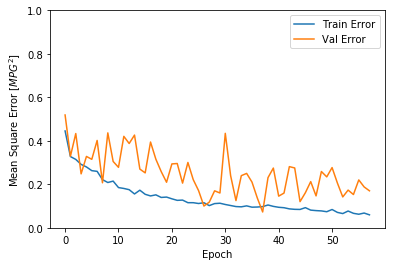

In [8]:
def plot_history(hist_df):
    

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error [$MPG^2$]')
    plt.plot(hist_df['epoch'], hist_df['mean_squared_error'],
           label='Train Error')
    plt.plot(hist_df['epoch'], hist_df['val_mean_squared_error'],
           label = 'Val Error')
    plt.ylim([0,1.0])
    plt.legend()
    plt.savefig('plots/bestNNmodel_learning_curve.png')
    plt.show()


plot_history(hist_df)



## Prepare the display table for agents & Analyze on the test set

In [21]:
df = pd.read_csv('TenantInfo-and-usage_shuffled_inf.csv'#, nrows=100
                )

/data/home/t-chepan/env/newlab/lib/python3.5/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (145,146) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [22]:
# # Use mature tenants as training and dev, use the new tenants as test.
age = 360
df_train = df.loc[df['Age'] >= age]
df_test = df.loc[df['Age'] < age]

df_train = df_train.drop('Age', axis=1)
df_test = df_test.drop('Age', axis=1)

In [23]:
# df_test.to_csv('data_8.21/df_test.csv', index=False)

In [24]:
outputs_name = [
     'AR_exchange_06',
 'AR_sharepoint_06',
 'AR_skype_06',
 'AR_teams_06',
 'AR_od4b_06',
 'AR_onenote_06',
 'AR_word_06',
 'AR_excel_06',
 'AR_powerpoint_06',
 'AR_outlook_06',
 'AR_eslt_06',
 'AR_officeclient_06'
]

In [25]:
display_cols = ['TenantId', 'CountryCode', 'TopParents_Industry','AllupSeats', 'PaidCount',
                'PaidEXOSeats', 'PaidSPOSeats', 'PaidOD4BSeats',
                'PaidTeamsSeats', 'PaidSFBSeats', 'PaidOfficeSeats'] + outputs_name

In [26]:
df_display = df_test.loc[:, display_cols]

In [27]:
df_display.shape

(478934, 23)

In [31]:
for i in range(len(test_pred[1])):
    col_name = outputs_name[i] +'_delta'
    df_display[col_name] = test_pred[:,i] - ytest[:,i]

In [32]:
df_display.head()

,TenantId,CountryCode,TopParents_Industry,AllupSeats,PaidCount,PaidEXOSeats,PaidSPOSeats,PaidOD4BSeats,PaidTeamsSeats,PaidSFBSeats,PaidOfficeSeats,AR_exchange_06,AR_sharepoint_06,AR_skype_06,AR_teams_06,AR_od4b_06,AR_onenote_06,AR_word_06,AR_excel_06,AR_powerpoint_06,AR_outlook_06,AR_eslt_06,AR_officeclient_06,AR_exchange_06_delta,AR_sharepoint_06_delta,AR_skype_06_delta,AR_teams_06_delta,AR_od4b_06_delta,AR_onenote_06_delta,AR_word_06_delta,AR_excel_06_delta,AR_powerpoint_06_delta,AR_outlook_06_delta,AR_eslt_06_delta,AR_officeclient_06_delta
0,946A2663-3AD0-46B8-90C0-DE373075DCCE,BE,0,5,5,4,0,0,0,1,0.0,0.550000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.080000,0.440000,0.080000,0.201248,-0.021855,0.001816,-0.005888,0.061500,0.006830,-0.048442,-0.075216,-0.006700,-0.104320,0.303693,-0.130630
1,61BEFEAC-AAD0-4D27-80DB-BEA99BAA3276,BE,Consumer Goods,99,99,98,98,99,98,98,0.0,0.756122,0.000000,0.002551,0.000510,0.117677,0.134848,0.304545,0.335354,0.211111,0.566667,0.753535,0.593434,-0.029681,0.111008,0.026397,0.070267,-0.001255,-0.115424,-0.041749,-0.034330,-0.143518,0.043503,-0.021852,0.057970
6,96847494-5BF3-483A-954E-0205FCC59791,IL,Other - Unsegmented,190,188,181,176,182,175,175,0.0,0.786188,0.041477,0.000000,0.026571,0.023352,0.005851,0.175266,0.160638,0.040691,0.335372,0.761170,0.353457,0.104305,0.013027,0.017809,0.021968,0.047962,0.008793,-0.016593,0.019705,0.005814,0.116238,0.128416,0.097951
11,C80F14D1-98F4-4E83-94E7-376CC5B34D63,US,Discrete Manufacturing,12,12,12,12,12,12,12,0.0,0.316667,0.000000,0.000000,0.000000,0.012500,0.000000,0.120833,0.108333,0.000000,0.325000,0.316667,0.341667,0.004105,0.022846,-0.001063,0.019965,0.031261,0.009394,-0.013198,0.013349,0.022391,-0.111899,0.007173,-0.080292
25,7E8FB864-A888-49CF-81B6-C072D37162DA,US,Smart Spaces,27,2,2,2,2,2,2,0.0,1.500000,1.050000,0.000000,0.000000,0.350000,0.000000,0.550000,0.175000,0.000000,1.500000,1.500000,1.500000,0.150122,-0.214734,0.076509,0.011876,0.035609,0.080140,-0.077833,0.256734,0.095378,0.029779,0.287293,0.079379


In [33]:
delta_cols = df_display.columns[-12:]

In [34]:
paidseats = ['PaidEXOSeats', 'PaidSPOSeats', 'PaidSFBSeats','PaidTeamsSeats',
             'PaidOD4BSeats', 'PaidOfficeSeats', 'PaidOfficeSeats','PaidOfficeSeats',
             'PaidOfficeSeats','PaidOfficeSeats','PaidCount', 'PaidOfficeSeats']

targets = list(zip(paidseats, delta_cols, outputs_name))

In [35]:
targets

[('PaidEXOSeats', 'AR_exchange_06_delta', 'AR_exchange_06'),
 ('PaidSPOSeats', 'AR_sharepoint_06_delta', 'AR_sharepoint_06'),
 ('PaidSFBSeats', 'AR_skype_06_delta', 'AR_skype_06'),
 ('PaidTeamsSeats', 'AR_teams_06_delta', 'AR_teams_06'),
 ('PaidOD4BSeats', 'AR_od4b_06_delta', 'AR_od4b_06'),
 ('PaidOfficeSeats', 'AR_onenote_06_delta', 'AR_onenote_06'),
 ('PaidOfficeSeats', 'AR_word_06_delta', 'AR_word_06'),
 ('PaidOfficeSeats', 'AR_excel_06_delta', 'AR_excel_06'),
 ('PaidOfficeSeats', 'AR_powerpoint_06_delta', 'AR_powerpoint_06'),
 ('PaidOfficeSeats', 'AR_outlook_06_delta', 'AR_outlook_06'),
 ('PaidCount', 'AR_eslt_06_delta', 'AR_eslt_06'),
 ('PaidOfficeSeats', 'AR_officeclient_06_delta', 'AR_officeclient_06')]

In [36]:
threshold = 0.05

for ps, delta, acr in targets:
    def f(row):
        if row[ps] <= 0:
            val = -1
        else:
            if row[delta] > threshold and row[acr] < 1:
                val = 1
            else:
                val = 0
        return val
    
    vals = []
    for i, row in df_display.iterrows():
        vals.append(f(row))
        
    df_display['Rec_{}'.format(acr)] = vals

In [37]:
df_display.head()

,TenantId,CountryCode,TopParents_Industry,AllupSeats,PaidCount,PaidEXOSeats,PaidSPOSeats,PaidOD4BSeats,PaidTeamsSeats,PaidSFBSeats,PaidOfficeSeats,AR_exchange_06,AR_sharepoint_06,AR_skype_06,AR_teams_06,AR_od4b_06,AR_onenote_06,AR_word_06,AR_excel_06,AR_powerpoint_06,AR_outlook_06,AR_eslt_06,AR_officeclient_06,AR_exchange_06_delta,AR_sharepoint_06_delta,AR_skype_06_delta,AR_teams_06_delta,AR_od4b_06_delta,AR_onenote_06_delta,AR_word_06_delta,AR_excel_06_delta,AR_powerpoint_06_delta,AR_outlook_06_delta,AR_eslt_06_delta,AR_officeclient_06_delta,Rec_AR_exchange_06,Rec_AR_sharepoint_06,Rec_AR_skype_06,Rec_AR_teams_06,Rec_AR_od4b_06,Rec_AR_onenote_06,Rec_AR_word_06,Rec_AR_excel_06,Rec_AR_powerpoint_06,Rec_AR_outlook_06,Rec_AR_eslt_06,Rec_AR_officeclient_06
0,946A2663-3AD0-46B8-90C0-DE373075DCCE,BE,0,5,5,4,0,0,0,1,0.0,0.550000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.080000,0.440000,0.080000,0.201248,-0.021855,0.001816,-0.005888,0.061500,0.006830,-0.048442,-0.075216,-0.006700,-0.104320,0.303693,-0.130630,1,-1,0,-1,-1,-1,-1,-1,-1,-1,1,-1
1,61BEFEAC-AAD0-4D27-80DB-BEA99BAA3276,BE,Consumer Goods,99,99,98,98,99,98,98,0.0,0.756122,0.000000,0.002551,0.000510,0.117677,0.134848,0.304545,0.335354,0.211111,0.566667,0.753535,0.593434,-0.029681,0.111008,0.026397,0.070267,-0.001255,-0.115424,-0.041749,-0.034330,-0.143518,0.043503,-0.021852,0.057970,0,1,0,1,0,-1,-1,-1,-1,-1,0,-1
6,96847494-5BF3-483A-954E-0205FCC59791,IL,Other - Unsegmented,190,188,181,176,182,175,175,0.0,0.786188,0.041477,0.000000,0.026571,0.023352,0.005851,0.175266,0.160638,0.040691,0.335372,0.761170,0.353457,0.104305,0.013027,0.017809,0.021968,0.047962,0.008793,-0.016593,0.019705,0.005814,0.116238,0.128416,0.097951,1,0,0,0,0,-1,-1,-1,-1,-1,1,-1
11,C80F14D1-98F4-4E83-94E7-376CC5B34D63,US,Discrete Manufacturing,12,12,12,12,12,12,12,0.0,0.316667,0.000000,0.000000,0.000000,0.012500,0.000000,0.120833,0.108333,0.000000,0.325000,0.316667,0.341667,0.004105,0.022846,-0.001063,0.019965,0.031261,0.009394,-0.013198,0.013349,0.022391,-0.111899,0.007173,-0.080292,0,0,0,0,0,-1,-1,-1,-1,-1,0,-1
25,7E8FB864-A888-49CF-81B6-C072D37162DA,US,Smart Spaces,27,2,2,2,2,2,2,0.0,1.500000,1.050000,0.000000,0.000000,0.350000,0.000000,0.550000,0.175000,0.000000,1.500000,1.500000,1.500000,0.150122,-0.214734,0.076509,0.011876,0.035609,0.080140,-0.077833,0.256734,0.095378,0.029779,0.287293,0.079379,0,0,1,0,0,-1,-1,-1,-1,-1,0,-1


In [38]:
df_display.to_csv('results/rec_display.csv', index=False)

## Take a look at the MSE for each workload (on dev set)

In [39]:
test_mse_multi = mean_squared_error(ytest, test_pred, multioutput='raw_values')
test_mse_multi

array([1.41845213, 0.70181993, 0.05675596, 0.21850249, 0.08745478,
       0.04415377, 1.23696137, 2.19268538, 0.25949921, 4.61251561,
       1.1892648 , 5.25476244])

In [40]:
dev_pred = loaded_model.predict(Xdev)
dev_mse_multi = mean_squared_error(ydev, dev_pred, multioutput='raw_values')
dev_mse_multi

array([0.16622209, 0.05342934, 0.02214206, 0.02528173, 0.02228389,
       0.00728146, 0.04094888, 0.09422252, 0.02493853, 0.13297166,
       0.15268793, 0.13137448])

In [42]:
outputs_name

['AR_exchange_06',
 'AR_sharepoint_06',
 'AR_skype_06',
 'AR_teams_06',
 'AR_od4b_06',
 'AR_onenote_06',
 'AR_word_06',
 'AR_excel_06',
 'AR_powerpoint_06',
 'AR_outlook_06',
 'AR_eslt_06',
 'AR_officeclient_06']

In [44]:
dev_outputs_mse = {}

for i, n in enumerate(outputs_name):
    
    dev_outputs_mse[n] = dev_mse_multi[i]
    
s = pd.Series(dev_outputs_mse).sort_values()

print(s)

AR_onenote_06         0.007281
AR_skype_06           0.022142
AR_od4b_06            0.022284
AR_powerpoint_06      0.024939
AR_teams_06           0.025282
AR_word_06            0.040949
AR_sharepoint_06      0.053429
AR_excel_06           0.094223
AR_officeclient_06    0.131374
AR_outlook_06         0.132972
AR_eslt_06            0.152688
AR_exchange_06        0.166222
dtype: float64


In [45]:
dev_mse_multi = dev_mse_multi.reshape((12,1))
test_mse_multi = test_mse_multi.reshape((12,1))
mse_data = np.concatenate((dev_mse_multi, test_mse_multi), axis=1)

In [46]:
mse_multi_df = pd.DataFrame(data=mse_data, columns=['dev_mse', 'test_mse'],
                           index=outputs_name)

In [47]:
mse_multi_df

,dev_mse,test_mse
AR_exchange_06,0.166222,1.418452
AR_sharepoint_06,0.053429,0.701820
AR_skype_06,0.022142,0.056756
AR_teams_06,0.025282,0.218502
AR_od4b_06,0.022284,0.087455
AR_onenote_06,0.007281,0.044154
AR_word_06,0.040949,1.236961
AR_excel_06,0.094223,2.192685
AR_powerpoint_06,0.024939,0.259499
AR_outlook_06,0.132972,4.612516


In [78]:
Xdev.shape

(13863, 489)

## How is the performance on purchased workloads?

In [49]:
features = pd.read_csv('data/encoded_columns_name.txt', delimiter='\t', header=None)

In [59]:
features.columns = ['cols_name']

In [60]:
len(features)

489

In [61]:
features[-180:]

,cols_name
309,TopParents_Industry=Insurance
310,TopParents_Industry=Libraries & Museums
311,TopParents_Industry=Local Regional Government
312,TopParents_Industry=Media & Entertainment
313,TopParents_Industry=National Government
314,TopParents_Industry=Nonprofit
315,TopParents_Industry=Other - Unsegmented
316,TopParents_Industry=Partner Professional Services
317,TopParents_Industry=Pharmaceuticals
318,TopParents_Industry=Primary & Secondary Edu/K-12


In [79]:
total_index = features.loc[features['cols_name'] == 'PaidCount'].index
exo_index = features.loc[features['cols_name'] == 'PaidEXOSeats'].index
spo_index = features.loc[features['cols_name'] == 'PaidSPOSeats'].index
od4b_index = features.loc[features['cols_name'] == 'PaidOD4BSeats'].index
teams_index = features.loc[features['cols_name'] == 'PaidTeamsSeats'].index
sfb_index = features.loc[features['cols_name'] == 'PaidSFBSeats'].index
office_index = features.loc[features['cols_name'] == 'PaidOfficeSeats'].index

In [77]:
Xdev[:,exo_index].shape


(13863, 1)

In [93]:
# outputs_name

In [80]:
mask_exo = np.where(Xdev[:,exo_index] > 0, 1, 0)
# mask_exo = mask_exo.reshape(Xdev.shape[0], 1)
mask_exo.shape

(13863, 1)

In [94]:
mask_spo = np.where(Xdev[:,spo_index] > 0, 1, 0)
mask_sfb = np.where(Xdev[:,sfb_index] > 0, 1, 0)
mask_teams = np.where(Xdev[:,teams_index] > 0, 1, 0)
mask_od4b = np.where(Xdev[:,od4b_index] > 0, 1, 0)
mask_eslt = np.where(Xdev[:,total_index] > 0, 1, 0)
mask_office = np.where(Xdev[:,office_index] > 0, 1, 0)

In [95]:
mask_office_all = np.ones((Xdev.shape[0], 5))

for i in range(5):
    mask_office_all[:,i] = mask_office[:,0]
    

In [96]:
mask_office_all.sum() == mask_office.sum() * 5

True

In [97]:
mask = np.concatenate([mask_exo, mask_spo, mask_sfb, mask_teams, mask_od4b, 
                       mask_office_all, mask_eslt, mask_office], axis=1)

In [98]:
mask.shape

(13863, 12)

In [99]:
squared_error = np.square(dev_pred - ydev)

In [100]:
purchased_workload_mse_multi = np.sum(mask * squared_error, axis=0) / np.sum(mask, axis=0)

In [101]:
purchased_workload_mse_multi

array([0.16973414, 0.02303954, 0.00685646, 0.0162417 , 0.00942605,
       0.02884515, 0.16762481, 0.41304399, 0.1734132 , 0.79432832,
       0.11320369, 1.89569167])

In [102]:
purchased_workload_ = {}

for i, n in enumerate(outputs_name):
    
    purchased_workload_[n] = purchased_workload_mse_multi[i]
    
s = pd.Series(purchased_workload_).sort_values()

print(s)

AR_skype_06           0.006856
AR_od4b_06            0.009426
AR_teams_06           0.016242
AR_sharepoint_06      0.023040
AR_onenote_06         0.028845
AR_eslt_06            0.113204
AR_word_06            0.167625
AR_exchange_06        0.169734
AR_powerpoint_06      0.173413
AR_excel_06           0.413044
AR_outlook_06         0.794328
AR_officeclient_06    1.895692
dtype: float64


In [103]:
purchased_workload_mse = np.mean(purchased_workload_mse_multi)
purchased_workload_mse

0.3176207254657568

## Simply use mean to predict the usage, what's the mse? 

In [104]:
ydev.shape

(13863, 12)

In [105]:
ytrain.shape

(1372529, 12)

In [106]:
mean_pred = np.mean(ytrain, axis=0)
mean_pred.shape

(12,)

In [114]:
mean_mse = np.mean(np.square(ydev - mean_pred))
mean_mse

0.8169947182001925

In [113]:
mean_mse_multi = np.mean(np.square(ydev - mean_pred), axis=0)
mean_mse_multi

array([2.34419446, 0.15412477, 0.00276937, 0.1736642 , 0.43636537,
       0.00648566, 0.26447185, 0.6825824 , 0.05135685, 1.65723474,
       2.25216427, 1.77852268])

In [115]:
mean_mse_workload_ = {}

for i, n in enumerate(outputs_name):
    
    mean_mse_workload_[n] = mean_mse_multi[i]
    
s = pd.Series(mean_mse_workload_).sort_values()

print(s)

AR_skype_06           0.002769
AR_onenote_06         0.006486
AR_powerpoint_06      0.051357
AR_sharepoint_06      0.154125
AR_teams_06           0.173664
AR_word_06            0.264472
AR_od4b_06            0.436365
AR_excel_06           0.682582
AR_outlook_06         1.657235
AR_officeclient_06    1.778523
AR_eslt_06            2.252164
AR_exchange_06        2.344194
dtype: float64


## Demo

In [ ]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import pickle as pkl
import joblib
import encoding_data

In [250]:
examples = pd.read_csv('data/dev_set_raw_data.csv')
#examples.head(10)

/data/home/t-chepan/env/newlab/lib/python3.5/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (142,147) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [251]:
examples.head()

,TenantId,CreatedDate,CreateDateOfFirstSubscription,CountryCode,AllupSeats,EXOSubscriptionsCount,OD4BSubscriptionsCount,SfBSubscriptionsCount,TeamsSubscriptionsCount,PaidCount,ProjectSubscriptionsCount,SPOSubscriptionsCount,ActivatedSubscriptionTotalCount,VisioSubscriptionsCount,TrialSubscriptionsCount,NonTrialSubscriptionsCount,Languange,DataCenterInstance,DataCenterModel,HasEXO,HasSPO,HasOD4B,HasSfB,HasYammer,HasTeams,HasTeamsFreemium,HasKaizala,HasProPlus,HasAADP,HasAIP,HasAATP,HasIntune,HasMCAS,HasWDATP,HasAudioConference,HasPhoneSystem,HasEdiscovery,HasCompliance,HasThreatIntelligence,HasCustomerLockbox,HasOATP,HasAADPP2,HasAIPP2,HasWindows,HasO365CAS,HasCASDiscovery,HasPAM,HasPowerBI,HasPowerBIPremium,HasPowerBIPro,HasVisio,HasProject,HasNonTrial,HasSubscription_AllCounted,WithoutTenantAdmin,OrgNameEnteredInCommerce,HasPartnerTenants,SignupLocationInfo_Country,SignupLocationInfo_CountryCode,SignupLocationInfo_Region,Subscriptions_HasPaidSeats,TopParents_AreaName,TopParents_BigAreaName,TopParents_CountryCode,TopParents_Industry,TopParents_RegionName,TopParents_SegmentGroup,TopParents_SubRegionName,TopParents_VerticalName,EXOEnabledUsers,SPOEnabledUsers,OD4BEnabledUsers,SFBEnabledUsers,TeamEnabledUsers,YammerEnabledUsers,PPDEnabledUsers,KaizalaEnabledUsers,AADPEnabledUsers,AIPEnabledUsers,AATPEnabledUsers,IntuneEnabledUsers,MCASEnabledUsers,WDATPEnabledUsers,AudioConferenceEnabledUsers,PhoneSystemEnabledUsers,EdiscoveryEnabledUsers,ComplianceEnabledUsers,ThreatIntelligenceEnabledUsers,CustomerLockboxEnabledUsers,OATPEnabledUsers,AADPP2EnabledUsers,AIPP2EnabledUsers,WindowsEnabledUsers,O365CASEnabledUsers,CASDiscoveryEnabledUsers,PAMEnabledUsers,O365EnabledUsers,EMSEnabledUsers,M365EnabledUsers,O365E5EnabledUsers,EMSE5EnabledUsers,M365E5EnabledUsers,TotalUsers,PaidEXOSeats,PaidSPOSeats,PaidOD4BSeats,PaidYammerSeats,PaidTeamsSeats,PaidSFBSeats,PaidKaizalaSeats,PaidProplusSeats,PaidAADPSeats,PaidAIPSeats,PaidAATPSeats,PaidIntuneSeats,PaidMCASSeats,PaidWDATPSeats,PaidAudioConferenceSeats,PaidPhoneSystemSeats,PaidOATPSeats,PaidAADPP2Seats,PaidAIPP2Seats,PaidWindowsSeats,PaidO365CASSeats,PaidCASDiscoverySeats,PaidPAMSeats,PaidPowerBISeats,PaidPowerBIPremiumSeats,PaidPowerBIProSeats,PaidEMSSeats,PaidM365Seats,PaidOfficeSeats,HasUsGovCloudOffer,FirstPaidEXOStartDate,FirstPaidSPOStartDate,FirstPaidOD4BStartDate,FirstPaidSfBStartDate,FirstPaidYammerStartDate,FirstPaidTeamsStartDate,FirstPaidProPlusStartDate,FirstPaidAADPStartDate,FirstPaidAIPStartDate,FirstPaidAATPStartDate,FirstPaidIntuneStartDate,FirstPaidMCASStartDate,FirstPaidO365E5SkuStartDate,FirstPaidM365E5SkuStartDate,FirstPaidEMSE5SkuStartDate,Has1YearFreeDomain,AU_exchange_04,AU_sharepoint_04,AU_skype_04,AU_teams_04,AU_od4b_04,AU_onenote_04,AU_word_04,AU_excel_04,AU_powerpoint_04,AU_outlook_04,AU_oatp_04,AU_odsp_04,AU_eslt_04,AU_officeclient_04,AU_exchange_05,AU_sharepoint_05,AU_skype_05,AU_teams_05,AU_od4b_05,AU_onenote_05,AU_word_05,AU_excel_05,AU_powerpoint_05,AU_outlook_05,AU_oatp_05,AU_odsp_05,AU_eslt_05,AU_officeclient_05,AU_exchange,AU_sharepoint,AU_skype,AU_teams,AU_od4b,AU_onenote,AU_word,AU_excel,AU_powerpoint,AU_outlook,AU_oatp,AU_odsp,AU_eslt,AU_officeclient,AR_exchange_04,AR_sharepoint_04,AR_skype_04,AR_teams_04,AR_od4b_04,AR_onenote_04,AR_word_04,AR_excel_04,AR_powerpoint_04,AR_outlook_04,AR_eslt_04,AR_officeclient_04,AR_exchange_05,AR_sharepoint_05,AR_skype_05,AR_teams_05,AR_od4b_05,AR_onenote_05,AR_word_05,AR_excel_05,AR_powerpoint_05,AR_outlook_05,AR_eslt_05,AR_officeclient_05,AR_exchange_06,AR_sharepoint_06,AR_skype_06,AR_teams_06,AR_od4b_06,AR_onenote_06,AR_word_06,AR_excel_06,AR_powerpoint_06,AR_outlook_06,AR_eslt_06,AR_officeclient_06
0,8A06EA26-549C-4DDF-AF9E-DE3D492F9F43,11/28/2011 5:30:16 PM,8/9/2017 12:00:00 AM,US,18,2,2,1,1,18,1,2,4,0,0,4,en,Global|GoLocal,PublicCloud|GoLocal,True,True,True,True,True,True,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,Fal

In [252]:
examples.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13863 entries, 0 to 13862
Columns: 227 entries, TenantId to AR_officeclient_06
dtypes: bool(40), float64(91), int64(64), object(32)
memory usage: 20.3+ MB


In [255]:
example_df = examples.iloc[1:2, :].copy()

In [ ]:
df_X, df_y = encoding_data.separate_input_output_cols(example_df, predict_ahead=0, previous_usage=0)

In [257]:
X_scal, _ = encoding_data.encode_dev_test_inputs(df_X, dv, scaler)

Starting to encode dev or test inputs...



KeyboardInterrupt



In [247]:
324 + 62 + 55 + 40 + 8

0.24.2


489

In [253]:
dv_file = '/data/home/t-chepan/projects/MS-intern-project/data/vectorizer.pkl' 
scaler_file = '/data/home/t-chepan/projects/MS-intern-project/data/scaler.pkl'
# default_example = {}
dv = joblib.load(dv_file)
scaler = joblib.load(scaler_file)

def encode_input(df, dv, scaler):
    df_X, df_y = encoding_data.separate_input_output_cols(df, predict_ahead=0, previous_usage=0)
    X_scal, _ = encoding_data.encode_dev_test_inputs(df_X, dv, scaler)
    print(X_scal.shape)
    return X_scal, df_y

def decode_output(output, names):
    usage_pattern = {}
    for i, name in enumerate(names):
        usage_pattern[name] = output[i]
    return usage_pattern

def predict_usage_pattern(model, example_df, dv, workload_names, scaler):
    example_input, df_y = encode_input(example_df, dv, scaler)
    output = model.predict(example_input)
    usage_pattern = decode_output(output[0], workload_names)
    return usage_pattern, df_y


# def display(usage_pattern):
#     for k, v in usage_pattern.items():
#         print('workload: {}, usage: {}'.format(k, v))
        

In [9]:
example_df = examples.iloc[1:2, :].copy()

usage_pattern, df_y = predict_usage_pattern(loaded_model, example_df, dv, outputs_name, scaler)
usage_pattern

# display(usage_pattern)
# lists = sorted(usage_pattern.items()) # sorted by key, return a list of tuples

# x, y = zip(*lists) # unpack a list of pairs into two tuples

# plt.bar(x, y)
# plt.xticks(rotation=90)
# plt.show()

NameError: name 'examples' is not defined

In [131]:
set(df_train['TopParents_Industry'])

{'0',
 'Automotive',
 'Banking & Capital Markets',
 'Chemicals & Agrochemicals',
 'Consumer Goods',
 'Defense & Intelligence',
 'Discrete Manufacturing',
 'Energy',
 'Forestry & Fishing',
 'Gaming',
 'Health Payor',
 'Health Provider',
 'Higher Education',
 'Insurance',
 'Libraries & Museums',
 'Local Regional Government',
 'Media & Entertainment',
 'National Government',
 'Nonprofit',
 'Other - Unsegmented',
 'Partner Professional Services',
 'Pharmaceuticals',
 'Primary & Secondary Edu/K-12',
 'Professional Services',
 'Retailers',
 'Smart Spaces',
 'Telecommunications',
 'Travel & Transportation'}

outputs shape is (1, 12)
inputs shape is (1, 191)
Starting to encode dev or test inputs...
{'AR_outlook_06': 0.6078834, 'AR_powerpoint_06': -0.030275349, 'AR_word_06': -0.0019260347, 'AR_exchange_06': 0.72613996, 'AR_eslt_06': 0.9676844, 'AR_sharepoint_06': 1.2546641, 'AR_teams_06': 0.02764214, 'AR_officeclient_06': 0.6788437, 'AR_skype_06': -0.021691568, 'AR_excel_06': -0.074682474, 'AR_od4b_06': 0.2589141, 'AR_onenote_06': -0.009499604}


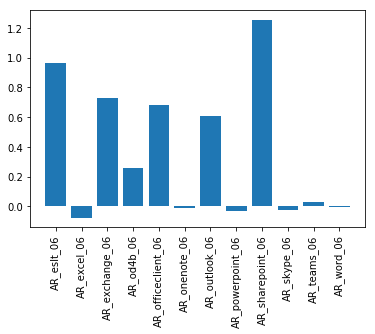

In [139]:
example_df['AllupSeats'] = 200
example_df['CountryCode'] = 'US'
# example_df['TopParents_Industry'] = '0'

example_df['TopParents_Industry'] = 'Telecommunications'


usage_pattern, df_y = predict_usage_pattern(loaded_model, example_df, dv, outputs_name, scaler)
print(usage_pattern)

lists = sorted(usage_pattern.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.bar(x, y)
plt.xticks(rotation=90)
plt.show()

outputs shape is (1, 12)
inputs shape is (1, 191)
Starting to encode dev or test inputs...
{'AR_outlook_06': 0.32676965, 'AR_powerpoint_06': 0.03203911, 'AR_word_06': 0.14829825, 'AR_exchange_06': 0.84699994, 'AR_eslt_06': 0.83992803, 'AR_sharepoint_06': 0.134666, 'AR_teams_06': 0.037909556, 'AR_officeclient_06': 0.3452013, 'AR_skype_06': 0.020363506, 'AR_excel_06': 0.16442612, 'AR_od4b_06': 0.07195382, 'AR_onenote_06': 0.009282259}


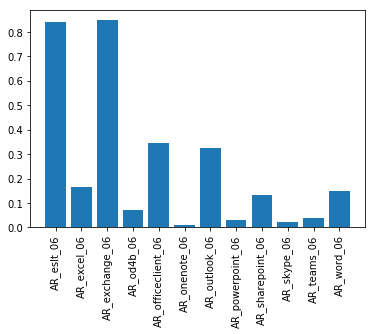

In [141]:
example_df['AllupSeats'] = 200
example_df['PaidPhoneSystemSeats'] = 200
example_df['CountryCode'] = 'LU'
example_df['TopParents_Industry'] = 'Health Provider'
# example_df['TopParents_Industry'] = 'Telecommunications'


usage_pattern, df_y = predict_usage_pattern(loaded_model, example_df, dv, outputs_name, scaler)
print(usage_pattern)

lists = sorted(usage_pattern.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.bar(x, y)
plt.xticks(rotation=90)
plt.show()

outputs shape is (1, 12)
inputs shape is (1, 191)
Starting to encode dev or test inputs...
{'AR_outlook_06': 0.5584716, 'AR_powerpoint_06': 0.036912292, 'AR_word_06': 0.21682893, 'AR_exchange_06': 0.7675637, 'AR_eslt_06': 0.87325585, 'AR_sharepoint_06': 1.0127981, 'AR_teams_06': 0.035058863, 'AR_officeclient_06': 0.63702923, 'AR_skype_06': 0.026213381, 'AR_excel_06': 0.20309034, 'AR_od4b_06': 0.13962746, 'AR_onenote_06': 0.00789956}


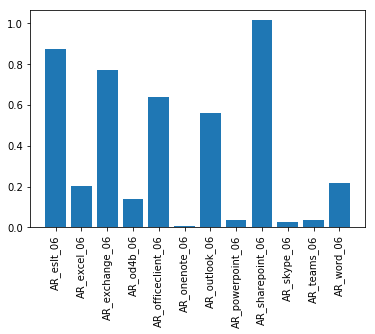

In [134]:
example_df['AllupSeats'] = 20
example_df['CountryCode'] = 'US'
example_df['TopParents_Industry'] = 'Banking & Capital Markets'

usage_pattern, df_y = predict_usage_pattern(loaded_model, example_df, dv, outputs_name, scaler)
print(usage_pattern)

lists = sorted(usage_pattern.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.bar(x, y)
plt.xticks(rotation=90)
plt.show()

In [95]:
## original default example
example_df = df_train.iloc[2:3, :].copy()
example_df

,TenantId,CreatedDate,CreateDateOfFirstSubscription,CountryCode,AllupSeats,EXOSubscriptionsCount,OD4BSubscriptionsCount,SfBSubscriptionsCount,TeamsSubscriptionsCount,PaidCount,ProjectSubscriptionsCount,SPOSubscriptionsCount,ActivatedSubscriptionTotalCount,VisioSubscriptionsCount,TrialSubscriptionsCount,NonTrialSubscriptionsCount,Languange,DataCenterInstance,DataCenterModel,HasEXO,HasSPO,HasOD4B,HasSfB,HasYammer,HasTeams,HasTeamsFreemium,HasKaizala,HasProPlus,HasAADP,HasAIP,HasAATP,HasIntune,HasMCAS,HasWDATP,HasAudioConference,HasPhoneSystem,HasEdiscovery,HasCompliance,HasThreatIntelligence,HasCustomerLockbox,HasOATP,HasAADPP2,HasAIPP2,HasWindows,HasO365CAS,HasCASDiscovery,HasPAM,HasPowerBI,HasPowerBIPremium,HasPowerBIPro,HasVisio,HasProject,HasNonTrial,HasSubscription_AllCounted,WithoutTenantAdmin,OrgNameEnteredInCommerce,HasPartnerTenants,SignupLocationInfo_Country,SignupLocationInfo_CountryCode,SignupLocationInfo_Region,Subscriptions_HasPaidSeats,TopParents_AreaName,TopParents_BigAreaName,TopParents_CountryCode,TopParents_Industry,TopParents_RegionName,TopParents_SegmentGroup,TopParents_SubRegionName,TopParents_VerticalName,EXOEnabledUsers,SPOEnabledUsers,OD4BEnabledUsers,SFBEnabledUsers,TeamEnabledUsers,YammerEnabledUsers,PPDEnabledUsers,KaizalaEnabledUsers,AADPEnabledUsers,AIPEnabledUsers,AATPEnabledUsers,IntuneEnabledUsers,MCASEnabledUsers,WDATPEnabledUsers,AudioConferenceEnabledUsers,PhoneSystemEnabledUsers,EdiscoveryEnabledUsers,ComplianceEnabledUsers,ThreatIntelligenceEnabledUsers,CustomerLockboxEnabledUsers,OATPEnabledUsers,AADPP2EnabledUsers,AIPP2EnabledUsers,WindowsEnabledUsers,O365CASEnabledUsers,CASDiscoveryEnabledUsers,PAMEnabledUsers,O365EnabledUsers,EMSEnabledUsers,M365EnabledUsers,O365E5EnabledUsers,EMSE5EnabledUsers,M365E5EnabledUsers,TotalUsers,PaidEXOSeats,PaidSPOSeats,PaidOD4BSeats,PaidYammerSeats,PaidTeamsSeats,PaidSFBSeats,PaidKaizalaSeats,PaidProplusSeats,PaidAADPSeats,PaidAIPSeats,PaidAATPSeats,PaidIntuneSeats,PaidMCASSeats,PaidWDATPSeats,PaidAudioConferenceSeats,PaidPhoneSystemSeats,PaidOATPSeats,PaidAADPP2Seats,PaidAIPP2Seats,PaidWindowsSeats,PaidO365CASSeats,PaidCASDiscoverySeats,PaidPAMSeats,PaidPowerBISeats,PaidPowerBIPremiumSeats,PaidPowerBIProSeats,PaidEMSSeats,PaidM365Seats,PaidOfficeSeats,HasUsGovCloudOffer,FirstPaidEXOStartDate,FirstPaidSPOStartDate,FirstPaidOD4BStartDate,FirstPaidSfBStartDate,FirstPaidYammerStartDate,FirstPaidTeamsStartDate,FirstPaidProPlusStartDate,FirstPaidAADPStartDate,FirstPaidAIPStartDate,FirstPaidAATPStartDate,FirstPaidIntuneStartDate,FirstPaidMCASStartDate,FirstPaidO365E5SkuStartDate,FirstPaidM365E5SkuStartDate,FirstPaidEMSE5SkuStartDate,Has1YearFreeDomain,AU_exchange_04,AU_sharepoint_04,AU_skype_04,AU_teams_04,AU_od4b_04,AU_onenote_04,AU_word_04,AU_excel_04,AU_powerpoint_04,AU_outlook_04,AU_oatp_04,AU_odsp_04,AU_eslt_04,AU_officeclient_04,AU_exchange_05,AU_sharepoint_05,AU_skype_05,AU_teams_05,AU_od4b_05,AU_onenote_05,AU_word_05,AU_excel_05,AU_powerpoint_05,AU_outlook_05,AU_oatp_05,AU_odsp_05,AU_eslt_05,AU_officeclient_05,AU_exchange,AU_sharepoint,AU_skype,AU_teams,AU_od4b,AU_onenote,AU_word,AU_excel,AU_powerpoint,AU_outlook,AU_oatp,AU_odsp,AU_eslt,AU_officeclient,AR_exchange_04,AR_sharepoint_04,AR_skype_04,AR_teams_04,AR_od4b_04,AR_onenote_04,AR_word_04,AR_excel_04,AR_powerpoint_04,AR_outlook_04,AR_eslt_04,AR_officeclient_04,AR_exchange_05,AR_sharepoint_05,AR_skype_05,AR_teams_05,AR_od4b_05,AR_onenote_05,AR_word_05,AR_excel_05,AR_powerpoint_05,AR_outlook_05,AR_eslt_05,AR_officeclient_05,AR_exchange_06,AR_sharepoint_06,AR_skype_06,AR_teams_06,AR_od4b_06,AR_onenote_06,AR_word_06,AR_excel_06,AR_powerpoint_06,AR_outlook_06,AR_eslt_06,AR_officeclient_06
4,4022B92B-EA9F-497B-985D-D335EB3CE735,10/31/2013 11:30:36 AM,10/31/2013 12:00:00 AM,US,12,1,0,0,0,12,0,0,2,0,0,2,en,Global|GoLocal,PublicCloud|GoLocal,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fals

In [96]:
example_df['CountryCode'] = 'UK'

In [212]:
def separate_input_output_cols(df):
    cols_name = pd.Series(data=df.columns)

    ar_04_beg_col_index = cols_name[cols_name == 'AR_exchange_04'].index[0]
    ar_06_beg_col_index = cols_name[cols_name == 'AR_exchange_06'].index[0]
    ar_06_end_col_index = cols_name[cols_name == 'AR_officeclient_06'].index[0]

    wl_AR_cols = cols_name[ar_04_beg_col_index:ar_06_end_col_index+1].tolist()

    output_cols = cols_name[ar_06_beg_col_index:ar_06_end_col_index+1].tolist()

    y = df.loc[:, output_cols]

    X = df.drop(columns=wl_AR_cols) # use profile only

    return X, y

In [228]:
dv_file = '/data/home/t-chepan/projects/MS-intern-project/results/vectorizer.pkl' 
scaler_file = '/data/home/t-chepan/projects/MS-intern-project/results/scaler.pkl'
default_example = {}
dv = joblib.load(dv_file)
scaler = joblib.load(scaler_file)

def encode_input(df, dv, scaler):
    df_X, df_y = separate_input_output_cols(df)
    X_arr = encoding_data.encode_dev_test_inputs(
        df_X, dv, 'demo')
    return scaler.transform(X_arr), df_y

def decode_output(output, names):
    usage_pattern = {}
    for i, name in enumerate(names):
        usage_pattern[name] = output[i]
    return usage_pattern

def predict_usage_pattern(model, example_df, dv, workload_names, scaler):
    example_input, df_y = encode_input(example_df, dv, scaler)
    output = model.predict(example_input)
    usage_pattern = decode_output(output[0], workload_names)
    return usage_pattern, df_y


def display(usage_pattern):
    for k, v in usage_pattern.items():
        print('workload: {}, usage: {}'.format(k, v))
        

example_df = df_test.iloc[4:5, :]

usage_pattern, df_y = predict_usage_pattern(loaded_model, example_df, dv, outputs_name, scaler)

display(usage_pattern)

Starting to encode dev or test inputs:
workload: AR_outlook_06, usage: 1.2955379486083984
workload: AR_od4b_06, usage: 0.31473976373672485
workload: AR_teams_06, usage: -0.006440533325076103
workload: AR_sharepoint_06, usage: 0.7883325219154358
workload: AR_skype_06, usage: -0.009027969092130661
workload: AR_eslt_06, usage: 1.557942509651184
workload: AR_exchange_06, usage: 1.4134788513183594
workload: AR_powerpoint_06, usage: 0.03916526585817337
workload: AR_officeclient_06, usage: 1.376962661743164
workload: AR_onenote_06, usage: 0.012934449128806591
workload: AR_word_06, usage: 0.3316196799278259
workload: AR_excel_06, usage: 0.29720357060432434


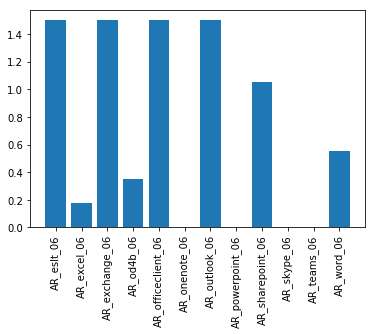

In [255]:
y = list(df_y.values[0])

cols = df_y.columns.to_list()


acr_usage_pattern = {}
for i in range(len(y)):
    acr_usage_pattern[cols[i]] = y[i]

lists = sorted(acr_usage_pattern.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.bar(x, y)
plt.xticks(rotation=90)
plt.show()    

In [259]:
# example_df['AllupSeats'] = 3

# usage_pattern = predict_usage_pattern(
#     loaded_model, example_df, dv, outputs_name, scaler)
# display(usage_pattern)

# lists = sorted(usage_pattern.items()) # sorted by key, return a list of tuples

# x, y = zip(*lists) # unpack a list of pairs into two tuples

# plt.bar(x, y)
# plt.xticks(rotation=90)
# plt.show()


In [223]:
example_df.columns

Index(['TenantId', 'CreatedDate', 'CreateDateOfFirstSubscription',
       'CountryCode', 'AllupSeats', 'EXOSubscriptionsCount',
       'OD4BSubscriptionsCount', 'SfBSubscriptionsCount',
       'TeamsSubscriptionsCount', 'PaidCount',
       ...
       'AR_skype_06', 'AR_teams_06', 'AR_od4b_06', 'AR_onenote_06',
       'AR_word_06', 'AR_excel_06', 'AR_powerpoint_06', 'AR_outlook_06',
       'AR_eslt_06', 'AR_officeclient_06'],
      dtype='object', length=227)

['AR_exchange_06',
 'AR_sharepoint_06',
 'AR_skype_06',
 'AR_teams_06',
 'AR_od4b_06',
 'AR_onenote_06',
 'AR_word_06',
 'AR_excel_06',
 'AR_powerpoint_06',
 'AR_outlook_06',
 'AR_eslt_06',
 'AR_officeclient_06']